In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf


import warnings

warnings.filterwarnings("ignore")

## Objective
To develop a fully integrated system with Meta Single Sign-On for easy access to ad account data, generate daily forecasts that users can see through a web window.

In [282]:
# Load Dataset
df =pd.read_csv('Winch-AdData-MSB10FD.csv', parse_dates=['Day'], index_col='Day')

In [283]:
df.head()


,Attribution setting,Conversion Volume,Reach,Views,Frequency,Cost Per Conversion,Amount spent (CAD),Quality ranking,Engagement rate ranking,Conversion rate ranking,Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Clicks (all),CTR (all),CPC (all),Reporting starts,Reporting ends
Day,,,,,,,,,,,,,,,,,,,,
2024-07-08,1-day click,37,30282,0,1.088964,19.301081,714.14,-,-,-,32976,21.656356,367,1.945886,1.112931,756,2.292576,0.944630,7/8/2024,7/8/2024
2024-07-07,1-day click,64,51275,0,1.101141,20.950937,1340.86,-,-,-,56461,23.748428,734,1.826785,1.300012,1352,2.394573,0.991760,7/7/2024,7/7/2024
2024-07-06,1-day click,58,48204,0,1.092980,21.776724,1263.05,-,-,-,52686,23.973162,640,1.973516,1.214744,1250,2.372547,1.010440,7/6/2024,7/6/2024
2024-07-05,1-day click,48,49677,0,1.171770,26.549167,1274.36,-,-,-,58210,21.892458,602,2.116877,1.034187,1246,2.140526,1.022761,7/5/2024,7/5/2024
2024-07-04,1-day click,85,52124,0,1.103714,14.985765,1273.79,-,-,-,57530,22.141318,716,1.779036,1.244568,1377,2.393534,0.925047,7/4/2024,7/4/2024


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 2024-07-08 to 2022-05-01
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Attribution setting               799 non-null    object 
 1   Conversion Volume                 799 non-null    int64  
 2   Reach                             799 non-null    int64  
 3   Views                             799 non-null    int64  
 4   Frequency                         799 non-null    float64
 5   Cost Per Conversion               799 non-null    float64
 6   Amount spent (CAD)                799 non-null    float64
 7   Quality ranking                   799 non-null    object 
 8   Engagement rate ranking           799 non-null    object 
 9   Conversion rate ranking           799 non-null    object 
 10  Impressions                       799 non-null    int64  
 11  CPM (cost per 1,000 impressions)  799 non-null    fl

In [285]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=['Attribution setting', 'Views', 'Quality ranking', 'Engagement rate ranking', 'Conversion rate ranking', 'Reporting starts', 'Reporting ends'])

# Verify the columns are dropped
print(df.columns)


Index(['Conversion Volume', 'Reach', 'Frequency', 'Cost Per Conversion',
       'Amount spent (CAD)', 'Impressions', 'CPM (cost per 1,000 impressions)',
       'Link clicks', 'CPC (cost per link click)',
       'CTR (link click-through rate)', 'Clicks (all)', 'CTR (all)',
       'CPC (all)'],
      dtype='object')


In [286]:
df.head()

,Conversion Volume,Reach,Frequency,Cost Per Conversion,Amount spent (CAD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Clicks (all),CTR (all),CPC (all)
Day,,,,,,,,,,,,,
2024-07-08,37,30282,1.088964,19.301081,714.14,32976,21.656356,367,1.945886,1.112931,756,2.292576,0.944630
2024-07-07,64,51275,1.101141,20.950937,1340.86,56461,23.748428,734,1.826785,1.300012,1352,2.394573,0.991760
2024-07-06,58,48204,1.092980,21.776724,1263.05,52686,23.973162,640,1.973516,1.214744,1250,2.372547,1.010440
2024-07-05,48,49677,1.171770,26.549167,1274.36,58210,21.892458,602,2.116877,1.034187,1246,2.140526,1.022761
2024-07-04,85,52124,1.103714,14.985765,1273.79,57530,22.141318,716,1.779036,1.244568,1377,2.393534,0.925047


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 2024-07-08 to 2022-05-01
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Conversion Volume                 799 non-null    int64  
 1   Reach                             799 non-null    int64  
 2   Frequency                         799 non-null    float64
 3   Cost Per Conversion               799 non-null    float64
 4   Amount spent (CAD)                799 non-null    float64
 5   Impressions                       799 non-null    int64  
 6   CPM (cost per 1,000 impressions)  799 non-null    float64
 7   Link clicks                       799 non-null    int64  
 8   CPC (cost per link click)         799 non-null    float64
 9   CTR (link click-through rate)     799 non-null    float64
 10  Clicks (all)                      799 non-null    int64  
 11  CTR (all)                         799 non-null    fl

In [289]:
df.describe()

,Conversion Volume,Reach,Frequency,Cost Per Conversion,Amount spent (CAD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Clicks (all),CTR (all),CPC (all)
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,121.668335,132534.829787,1.088808,20.662547,2544.547146,144524.718398,17.746964,1385.854819,1.799763,1.005831,2487.244055,1.807705,1.014099
std,39.174168,55800.386908,0.024835,5.731428,1151.357840,61528.946036,3.061585,479.214765,0.367183,0.169011,918.840189,0.371673,0.244869
min,6.000000,9310.000000,1.025671,8.396457,164.380000,9549.000000,9.256486,94.000000,0.946756,0.687259,190.000000,1.171142,0.494239
25%,92.000000,89018.500000,1.071097,16.199234,1604.105000,96716.000000,15.531087,1025.500000,1.554342,0.878410,1791.000000,1.544829,0.838479
50%,119.000000,124087.000000,1.088009,20.410594,2361.610000,135638.000000,17.576166,1353.000000,1.766277,0.964763,2352.000000,1.730946,0.984055
75%,148.000000,171648.000000,1.104143,24.456790,3263.910000,186448.500000,19.642126,1709.000000,2.026139,1.129577,3089.000000,1.968885,1.139984
max,243.000000,337408.000000,1.236099,46.364457,6065.750000,375458.000000,29.529916,2763.000000,3.225805,1.594763,5677.000000,3.490266,1.857681


In [290]:
# Define target and features
target = "Conversion Volume"


In [291]:
# Split data (70% train, 15% val, 15% test)
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
test_size = len(df) - train_size - val_size

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]


In [293]:
# Build ARIMA model on training data
model = ARIMA(train_data[target], order=(1, 1, 1))  # Adjust p, d, q as needed
fitted_model = model.fit()


In [294]:
# Forecast for validation and test sets
forecast_val = fitted_model.forecast(steps=val_size)
forecast_test = fitted_model.forecast(steps=test_size, dynamic=True)


In [295]:
# Evaluate on validation data
mae_val = mean_absolute_error(val_data[target], forecast_val)
rmse_val = mean_squared_error(val_data[target], forecast_val)

# Evaluate on test data
mae_test = mean_absolute_error(test_data[target], forecast_test)
rmse_test = mean_squared_error(test_data[target], forecast_test)

# Print evaluation metrics
print("Validation MAE:", mae_val)
print("Validation RMSE:", rmse_val)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)


Validation MAE: 46.50571687139228
Validation RMSE: 3001.5215204661854
Test MAE: 28.161751887294766
Test RMSE: 1271.190695290101


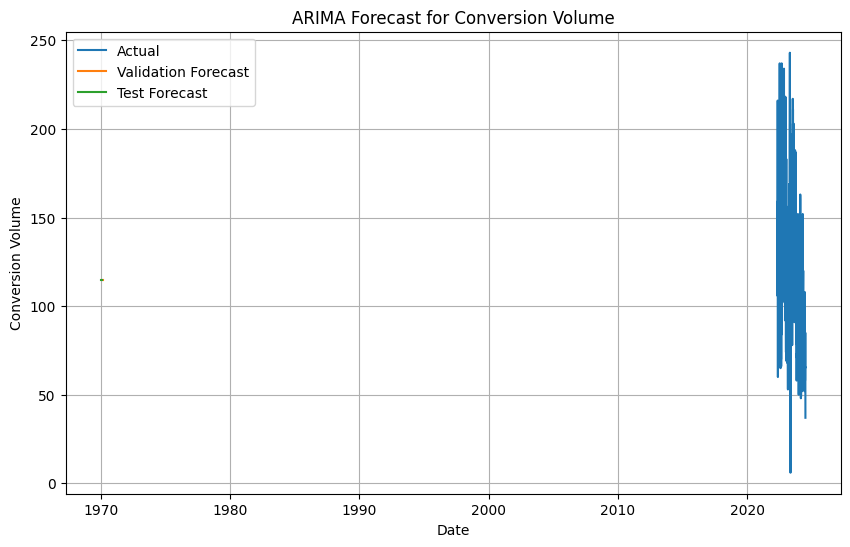

In [296]:
# Extract the relevant portion of the forecast for validation
forecast_val_aligned = forecast_val[-len(val_df.index):]

# Extract the relevant portion of the forecast for the test set
forecast_test_aligned = forecast_test[-len(test_df.index):]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[target], label='Actual')  # Full actual data
plt.plot(val_df.index, forecast_val_aligned, label='Validation Forecast')  # Aligned validation forecast
plt.plot(test_df.index, forecast_test_aligned, label='Test Forecast')  # Aligned test forecast
plt.legend()
plt.xlabel('Date')
plt.ylabel(target)
plt.title(f"ARIMA Forecast for {target}")
plt.grid()
plt.show()


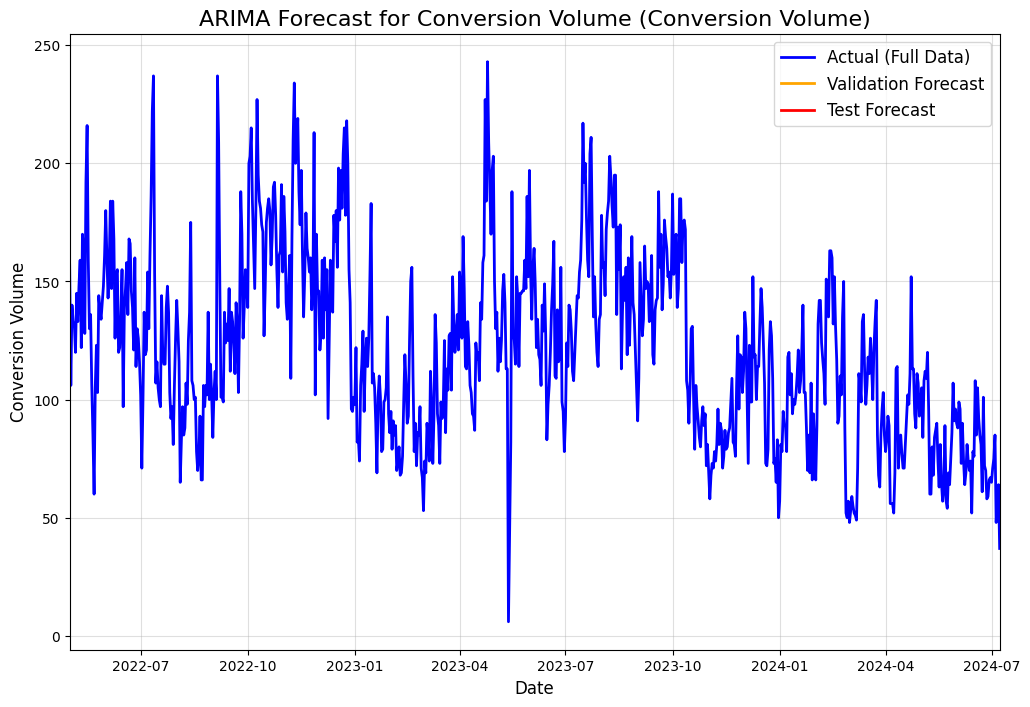

In [297]:

# Plot the results
plt.figure(figsize=(12, 8))

# Plot actual data
plt.plot(df.index, df[target], label='Actual (Full Data)', color='blue', linewidth=2)

# Plot validation forecast
plt.plot(val_df.index, forecast_val_aligned, label='Validation Forecast', color='orange', linewidth=2)

# Plot test forecast
plt.plot(test_df.index, forecast_test_aligned, label='Test Forecast', color='red', linewidth=2)

# Add title and labels
plt.title(f"ARIMA Forecast for {target} (Conversion Volume)", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel(target, fontsize=12)

# Add grid and legend
plt.grid(alpha=0.4)
plt.legend(fontsize=12)

# Focus on the relevant data range
plt.xlim(df.index.min(), df.index.max())  # Adjust limits if needed to focus on forecast section
plt.show()


In [298]:
# Use historical averages to calculate costs and revenues
avg_cost_per_conversion = df['Cost Per Conversion'].mean()
avg_revenue_per_conversion = df['Amount spent (CAD)'].mean()

forecast_volume = 1000

forecast_cost = forecast_volume * avg_cost_per_conversion
forecast_revenue = forecast_volume * avg_revenue_per_conversion
forecast_profit = forecast_revenue - forecast_cost

# Prepare forecast DataFrame
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Volume': forecast_volume,
    'Forecasted Cost': forecast_cost,
    'Forecasted Revenue': forecast_revenue,
    'Forecasted Profit': forecast_profit
})

# Display forecasted DataFrame
print(forecast_df)

         Date  Forecasted Volume  Forecasted Cost  Forecasted Revenue  \
0  2022-05-02               1000     20662.546862        2.544547e+06   
1  2022-05-03               1000     20662.546862        2.544547e+06   
2  2022-05-04               1000     20662.546862        2.544547e+06   
3  2022-05-05               1000     20662.546862        2.544547e+06   
4  2022-05-06               1000     20662.546862        2.544547e+06   
5  2022-05-07               1000     20662.546862        2.544547e+06   
6  2022-05-08               1000     20662.546862        2.544547e+06   
7  2022-05-09               1000     20662.546862        2.544547e+06   
8  2022-05-10               1000     20662.546862        2.544547e+06   
9  2022-05-11               1000     20662.546862        2.544547e+06   
10 2022-05-12               1000     20662.546862        2.544547e+06   
11 2022-05-13               1000     20662.546862        2.544547e+06   
12 2022-05-14               1000     20662.546862  

In [300]:
# Create new column called 'Total Cost'
df['Total Cost'] = df['Cost Per Conversion'] * df['Conversion Volume']


In [301]:
# Calculate Cost of Conversion
df['Cost of Conversion'] = df['Total Cost'] / df['Conversion Volume']

# Handle cases where Conversion Volume is 0 to avoid division errors
df['Cost of Conversion'] = df['Cost of Conversion'].replace([np.inf, -np.inf], np.nan).fillna(0)


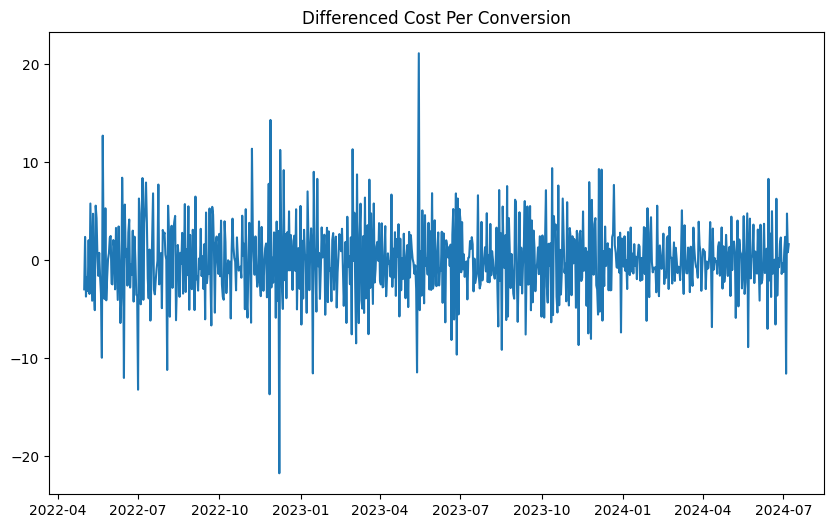

In [314]:
# Forecast Cost Per Conversion
cost_per_conversion = df['Cost Per Conversion']
result_cost_per_conversion = adfuller(cost_per_conversion)
if result_cost_per_conversion[1] > 0.05:  # if not stationary
    cost_per_conversion_diff = cost_per_conversion.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(cost_per_conversion_diff)
    plt.title("Differenced Cost Per Conversion")
    plt.show()
else:
    cost_per_conversion_diff = cost_per_conversion  # Data is already stationary

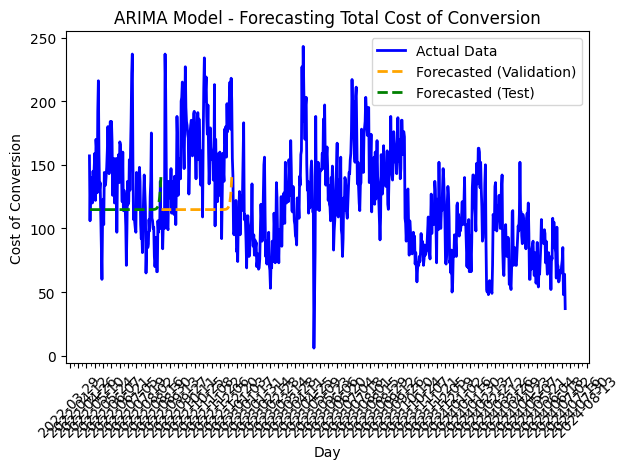

In [302]:
# Add labels and title
plt.xlabel('Day')
plt.ylabel('Cost of Conversion')
plt.title('ARIMA Model - Forecasting Total Cost of Conversion')

# Plot the actual values
plt.plot(df.index, df[target], label='Actual Data', color='blue', linewidth=2)

# Plot the forecasted values for validation
plt.plot(val_data.index, forecast_val, label='Forecasted (Validation)', color='orange', linestyle='--', linewidth=2)

# Plot the forecasted values for test data
plt.plot(test_data.index, forecast_test, label='Forecasted (Test)', color='green', linestyle='--', linewidth=2)

# Show legend
plt.legend()

# Format x-ticks for time series
plt.xticks(rotation=45)  # Rotate the x-tick labels to make them readable
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format date as Year-Month-Day
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust as needed)
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.WeekdayLocator())  # Add minor ticks for each week (optional)

# Adjust layout for better display
plt.tight_layout()

# Show plot
plt.show()


Text(0.5, 1.0, 'ARIMA Model - Forecasting Revenue')

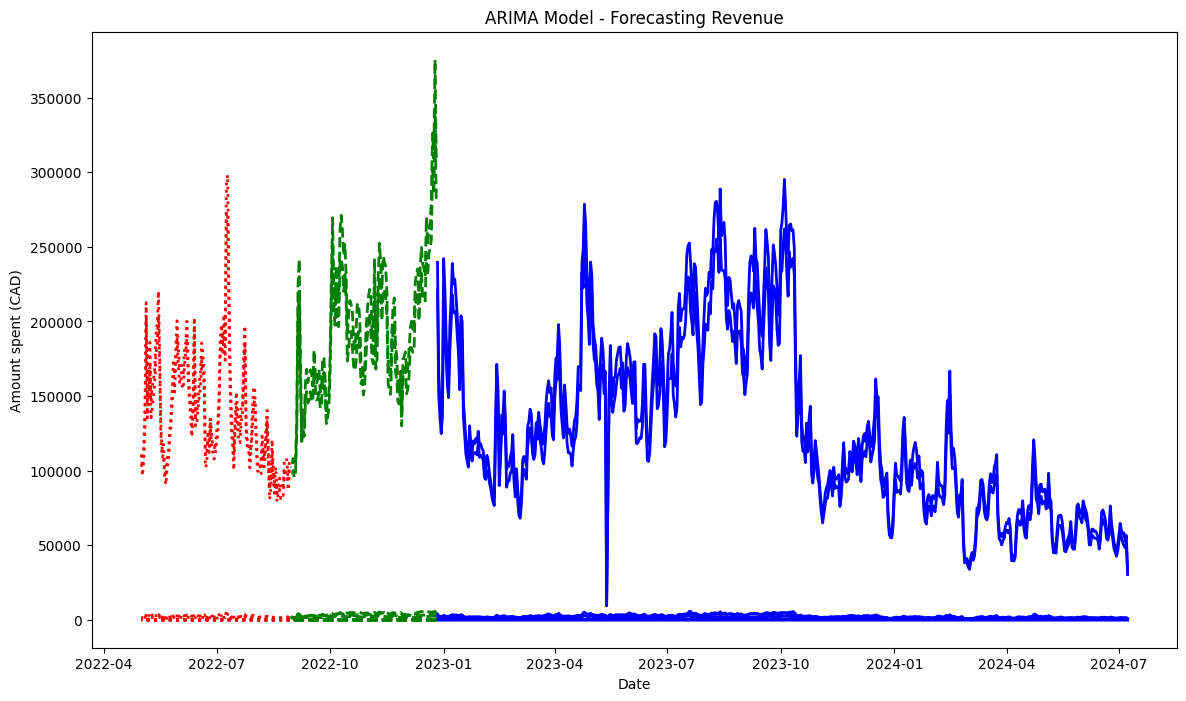

In [310]:
# Forecast the next 30 days
forecast_steps = 30  # Define forecast steps
forecast = fitted_model.forecast(steps=forecast_steps)

# Combine forecast with actual data
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Revenue'])

# Visualizing the results
plt.figure(figsize=(14, 8))

# Plot historical data (training data)
plt.plot(df.index[:len(train_data)], train_data, label='Historical Revenue (Training)', color='blue', linewidth=2)

# Plot validation data
plt.plot(df.index[len(train_data):len(train_data) + len(val_data)], val_data, label='Validation Revenue', color='green', linestyle='dashed', linewidth=2)

# Plot test data
plt.plot(df.index[len(train_data) + len(val_data):], test_data, label='Test Revenue', color='red', linestyle='dotted', linewidth=2)

# Plot forecasted data (next 30 days)
plt.plot(forecast_df.index, forecast_df['Forecasted Revenue'], label='Forecasted Revenue', color='orange', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount spent (CAD)')
plt.title('ARIMA Model - Forecasting Revenue')


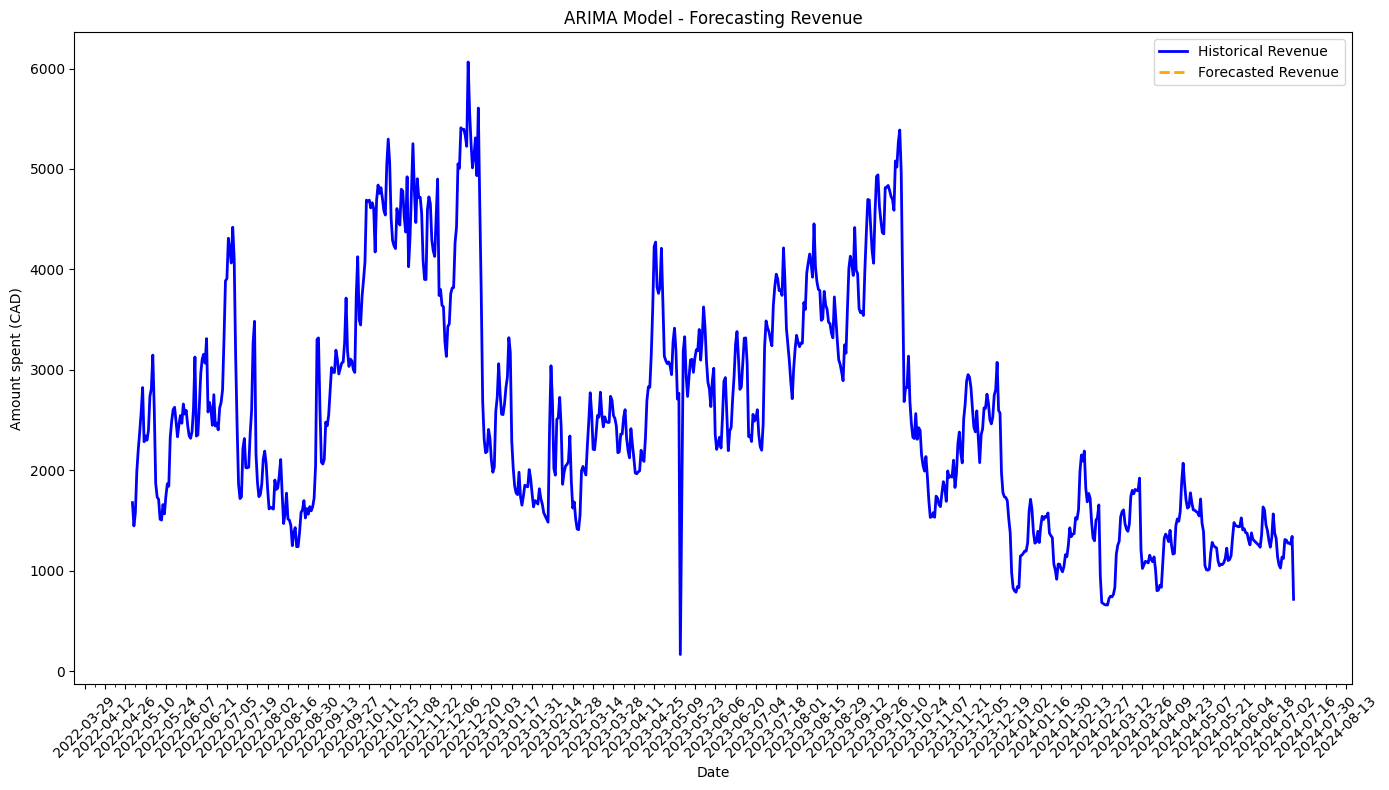

           Forecasted Revenue
2022-05-02                NaN
2022-05-03                NaN
2022-05-04                NaN
2022-05-05                NaN
2022-05-06                NaN
2022-05-07                NaN
2022-05-08                NaN
2022-05-09                NaN
2022-05-10                NaN
2022-05-11                NaN
2022-05-12                NaN
2022-05-13                NaN
2022-05-14                NaN
2022-05-15                NaN
2022-05-16                NaN
2022-05-17                NaN
2022-05-18                NaN
2022-05-19                NaN
2022-05-20                NaN
2022-05-21                NaN
2022-05-22                NaN
2022-05-23                NaN
2022-05-24                NaN
2022-05-25                NaN
2022-05-26                NaN
2022-05-27                NaN
2022-05-28                NaN
2022-05-29                NaN
2022-05-30                NaN
2022-05-31                NaN


In [309]:
# Forecast the next 30 days
forecast_steps = 30  # Define forecast steps
forecast = fitted_model.forecast(steps=forecast_steps)

# Combine forecast with actual data
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Revenue'])

# Visualizing the results
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(df.index, df['Amount spent (CAD)'], label='Historical Revenue', color='blue', linewidth=2)

# Plot forecasted data
plt.plot(forecast_df.index, forecast_df['Forecasted Revenue'], label='Forecasted Revenue', color='orange', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount spent (CAD)')
plt.title('ARIMA Model - Forecasting Revenue')

# Show legend
plt.legend()

# Format x-ticks for time series
plt.xticks(rotation=45)  # Rotate the x-tick labels to make them readable
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format date as Year-Month-Day
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust as needed)
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.WeekdayLocator())  # Add minor ticks for each week (optional)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output forecast values
print(forecast_df)